In [1]:
# !pip3 install squaternion

In [1]:
import os
import gym
import time
from Ramp_1 import Ascento
# from balance_pend import InvertedPendulumEnv as Ascento
from stable_baselines3 import PPO, DDPG, SAC
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold

In [2]:
env = Ascento()

/home/gaurav/.local/lib/python3.6/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


In [3]:
from stable_baselines3.common.env_util import make_vec_env

In [4]:
vec_env = make_vec_env(Ascento, n_envs=1)

In [7]:
model = PPO.load("/home/gaurav/final_year_project/Ascetno_RL_Joint_Limited/Training/model_for_demo.zip", env = vec_env)

In [9]:
env = Ascento()
env.reset_model()
m1 = []
m2 = []
m3 = []

m4 = []

for i_episode in range(1):
    observation = env.reset()
    done = None
    while not done:
        env.render()
        action, _ = model.predict(env._get_obs())
        m1.append(action[0])
        m2.append(action[1])
        m3.append(action[2])
        m4.append(action[3])
#         action[2] = 1
#         action[3] = 1

        observation, reward, done, info = env.step(action)
        
env.close()

Creating window glfw


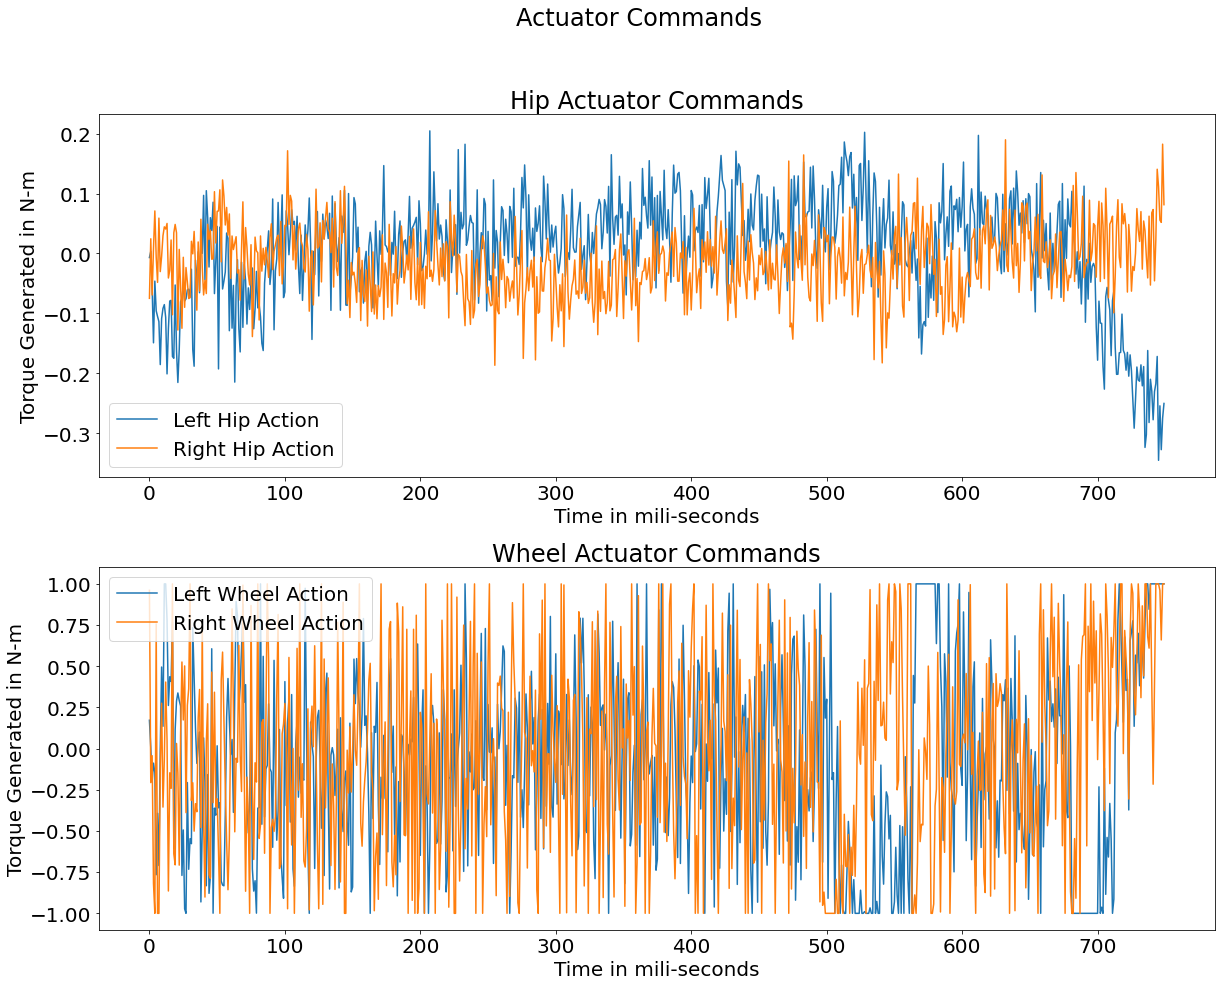

In [9]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=0.25)
plt.subplot(2, 1, 1)
plt.plot(m1, label="Left Hip Action")
plt.plot(m2, label="Right Hip Action")
# plt.ylim(-90, 90)
plt.title("Hip Actuator Commands")
plt.xlabel("Time in mili-seconds")
plt.ylabel("Torque Generated in N-m")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(m3, label="Left Wheel Action")
plt.plot(m4, label="Right Wheel Action")
# plt.ylim(-90, 90)
plt.title("Wheel Actuator Commands")
plt.xlabel("Time in mili-seconds")
plt.ylabel("Torque Generated in N-m")
plt.legend()

plt.suptitle("Actuator Commands")
# plt.suptitle("PID on Bump Terrain Terrain with No External Distrubance")

plt.show()

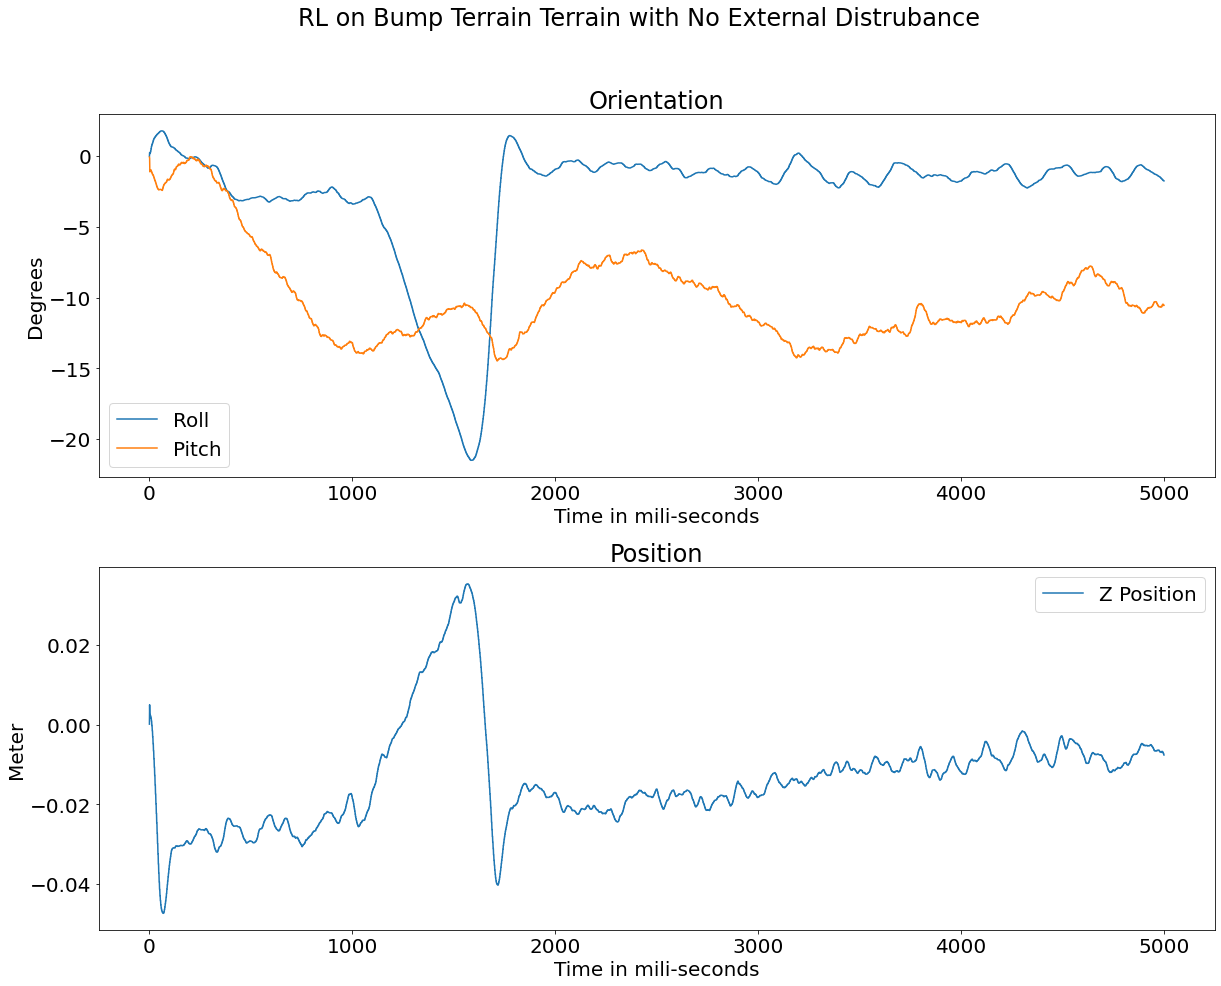

In [10]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=0.25)
plt.subplot(2, 1, 1)
plt.plot(env.roll_pitch, label="Roll")
plt.plot(env.pitch_pitch, label="Pitch")
# plt.ylim(-90, 90)
plt.title("Orientation")
plt.xlabel("Time in mili-seconds")
plt.ylabel("Degrees")
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(env.z_list, label="Z Position")
plt.title("Position")
plt.xlabel("Time in mili-seconds")
plt.ylabel("Meter")
plt.legend()

plt.suptitle("RL on Bump Terrain Terrain with No External Distrubance")
# plt.suptitle("PID on Bump Terrain Terrain with No External Distrubance")

plt.show()